# Exercise 01 - Let's get OOP!

# Imports

In [15]:
import numpy as np
import nilearn
import os
import nibabel as nib
import dicom


import matplotlib.pyplot as plt
import time

import re
from skimage import measure
from skimage.util.montage import montage2d
from IPython import display
%matplotlib inline  

ModuleNotFoundError: No module named 'nilearn'

# Group A
In this exercise, you will load a simulated brain MR file in MINC format, visualize it and extract some features. We want to encourage you to write code that is easy to understand and well structured, so everything will be encapsulated in classes ;)

In [2]:
# Class for working with a MINC file in the context of machine learning
# You will complete this class in the tasks below
class MINC:
    
    def __init__(self, filename):
        # TASK 1
        # Load the file and store the result inside an instance attribute called "minc"
        
        # Store the actual data inside an instance attribute called "data"
        return None
        
    @property
    def numSaggitalSlices(self):
        # TASK 1
        # Complete: return the number of saggital slices
        return None

    @property
    def numCoronalSlices(self):
        # TASK 1
        # Complete: return the number of coronal slices
        return None

    @property
    def numAxialSlices(self):
        # TASK 1
        # Complete: return the number of axial slices
        return None
        
    def normalize(self):
        # TASK 3
        # Convert the attribute "data" to float()
        
        # Make sure the data is in the range from 0 to 1
        return None
        
    def getSlice(self, the_slice, axis='axial'):
        # TASK 2
        # Extract a slice from the volume given an axis string and an integer denoting the slice position
        return None
        
    def visualize(self, axis='axial'):
        # TASK 2
        # Given an axis, which will be a string "axial", "coronal" or "saggital", 
        # extract slices along the given axis and visualize them using a for-loop
        return None
        
    def printStats(self):
        # TASK 1
        # Print min, max, mean, numSaggitalSlices, numCoronalSlices and numAxialSlices
        print("MINC Statistics")
    

# Task 1: Implement the constructor and the method printStats() of class MINC
* The class MINC takes as argument a filename and should load a MINC file using nibabel.
* Thus, make yourself familiar with nibabel
* Further, implement printStats(), which should simply print some information about the volume such as min(), max(), mean() and its dimensions
* Therefore, recall the medical terms saggital, coronal and axial
* And implement the properties numSaggitalSlices, numCoronalSlices and numAxialSlices!

In [3]:
minc = MINC('data/t1_icbm_normal_1mm_pn3_rf20.mnc.gz')
minc.printStats()

MINC Statistics


# Task 2: Write a method to visualize the entire volume, and run it
* implement the method visualize()
* given an axis, which will be a string "axial", "coronal" or "saggital", extract slices along the given axis and visualize them using a for-loop
* make use of the method getSlice(), which you are also asked to complete

In [4]:
minc.visualize(axis='axial')

# Task 3: Normalization
* Data usually should be normalized to avoid numerical instabilities
* implement a method normalize() which normalizes the data as described in the method skeleton

In [5]:
minc.normalize()
minc.printStats()

MINC Statistics


# Task 4: Statistical Feature Extraction
Now let us extract a slice and collect some image features
* get and show a histogram of image intensities in the selected slice with 256 bins
* collect statistical features such as mean, median, variance

In [6]:
slice_ = minc.getSlice(80, axis='axial') # Don't call it slice, or you will overwrite a python method named slice!
plt.imshow(slice_)

# TODO: compute and show a histogram of the slice with 256 bins

# TODO: Obtain mean, median and variance image intensity of the current slice 
# and store them in a variable called "features_stats. Print them

NameError: name 'plt' is not defined

# Connected Components Feature Extraction
Now let us threshold the image and compute the connected components
* threshold at intensity ?
* compute connected components on the binary image
* obtain area and spatial moments up to 3rd order, store them into the variable features_cc

In [7]:
# TODO: threshold the previously extracted slice and obtain a binary image
# in which you can separate the brain from background
# Choose an appropriate threshold
threshold = ???

# TODO: Show the binary image

# TODO: Compute the connected components using the "measure" module from "skimage". 
# Print the number of connected components and some of the features of the first connected component

SyntaxError: invalid syntax (<ipython-input-7-3bfefe7f9b44>, line 4)

# Group B
In this exercise, you will load a real lung cancer CT image in DICOM format, visualize it and extract some features. We want to encourage you to write code that is easy to understand and well structured, so everything will be encapsulated in classes ;)

The image is downloaded from https://wiki.cancerimagingarchive.net/display/Public/LungCT-Diagnosis

In [8]:
# Class for working with a DICOM CT file in the context of machine learning
# You will complete this class in the tasks below
class DICOM:
    
    def __init__(self, dicomfolder):
        # Inspired by https://pyscience.wordpress.com/2014/09/08/dicom-in-python-importing-medical-image-data-into-numpy-with-pydicom-and-vtk/
        # Load the files and store the resulting volume inside an instance attribute called "data"
        self.dicom_files = []  # create an empty list
        for dirName, subdirList, fileList in os.walk(dicomfolder):
            for filename in fileList:
                if ".dcm" in filename.lower():  # check whether the file's DICOM
                    self.dicom_files.append(os.path.join(dirName,filename))
        
        # Get ref file
        # TASK 1: Complete. use pydicom to read the first dicom file from self.dicom_files 
        # and store inside self.dicom_reference

        # Load dimensions based on the number of rows, columns, and slices (along the Z axis)
        ConstPixelDims = (int(self.dicom_reference.Rows), int(self.dicom_reference.Columns), len(self.dicom_files))

        # Load spacing values (in mm)
        ConstPixelSpacing = (float(self.dicom_reference.PixelSpacing[0]), float(self.dicom_reference.PixelSpacing[1]), float(self.dicom_reference.SliceThickness))
        
        x = np.arange(0.0, (ConstPixelDims[0]+1)*ConstPixelSpacing[0], ConstPixelSpacing[0])
        y = np.arange(0.0, (ConstPixelDims[1]+1)*ConstPixelSpacing[1], ConstPixelSpacing[1])
        z = np.arange(0.0, (ConstPixelDims[2]+1)*ConstPixelSpacing[2], ConstPixelSpacing[2])
        
        # TASK 1: Complete. create zero-initialized numpy array with dimensionality provided in ConstPixelDims
        # and the datatype provided n self.dicom_reference
        # The array is sized based on 'ConstPixelDims'

        # loop through all the DICOM files
        for filenameDCM in self.dicom_files:
            # TASK 1
            # read the current file and store the result into a variable named "ds"
            
            # store the raw image data
            self.data[:, :, self.dicom_files.index(filenameDCM)] = ds.pixel_array
        
    @property
    def numSaggitalSlices(self):
        # TASK 1
        # Complete: return the number of saggital slices
        return None

    @property
    def numCoronalSlices(self):
        # TASK 1
        # Complete: return the number of coronal slices
        return None

    @property
    def numAxialSlices(self):
        # TASK 1
        # Complete: return the number of axial slices
        return None
        
    def normalize(self):
        # TASK 3
        # Convert the attribute "data" to float()
        
        # Make sure the data is in the range from 0 to 1
        return None
        
    def getSlice(self, the_slice, axis='axial'):
        # TASK 2
        # Extract a slice from the volume given an axis string and an integer denoting the slice position
        return None
        
    def visualize(self, axis='axial'):
        # TASK 2
        # Given an axis, which will be a string "axial", "coronal" or "saggital", 
        # extract slices along the given axis and visualize them using a for-loop
        return None
        
    def printStats(self):
        # TASK 1
        # Print min, max, mean, numSaggitalSlices, numCoronalSlices and numAxialSlices
        print("DICOM Statistics")
        
    

# Task 1: Implement the constructor and the method printStats() of class DICOM
* The class DICOM takes as argument a folder name and should load a set of dicom files using pydicom.
* Thus, make yourself familiar with pydicom
* Further, implement printStats(), which should simply print some information about the volume such as min(), max(), mean() and its dimensions
* Therefore, recall the medical terms saggital, coronal and axial
* And implement the properties numSaggitalSlices, numCoronalSlices and numAxialSlices!

In [9]:
dcm = DICOM('data/lungcancerct.dicom')
dcm.printStats()

NameError: name 'os' is not defined

# Task 2: Write a method to visualize the entire volume, and run it
* implement the method visualize()
* given an axis, which will be a string "axial", "coronal" or "saggital", extract slices along the given axis and visualize them using a for-loop
* make use of the method getSlice(), which you are also asked to complete

In [10]:
dcm.visualize(axis='axial')

NameError: name 'dcm' is not defined

# Task 3: Normalization
* Data usually should be normalized to avoid numerical instabilities
* implement a method normalize() which normalizes the data as described in the method skeleton

In [11]:
dcm.normalize()
dcm.printStats()

NameError: name 'dcm' is not defined

# Task 4: Statistical Feature Extraction
Now let us extract a slice and collect some image features
* get and show a histogram of image intensities in the selected slice with 256 bins
* collect statistical features such as mean, median, variance

In [12]:
slice_ = dcm.getSlice(32, axis='axial') # Don't call it slice, or you will overwrite a python method named slice!
plt.imshow(slice_)

# TODO: compute and show a histogram of the slice with 256 bins

# TODO: Obtain mean, median and variance image intensity of the current slice 
# and store them in a variable called "features_stats. Print them


NameError: name 'dcm' is not defined

# Connected Components Feature Extraction
Now let us threshold the image and compute the connected components
* threshold at intensity ?
* compute connected components on the binary image
* obtain area and spatial moments up to 3rd order, store them into the variable features_cc

In [13]:
# TODO: threshold the previously extracted slice and obtain a binary image
# in which you can separate the brain from background
# Choose an appropriate threshold
threshold = ???

# TODO: Show the binary image

# TODO: Compute the connected components using the "measure" module from "skimage". 
# Print the number of connected components and some of the features of the first connected component


SyntaxError: invalid syntax (<ipython-input-13-3bfefe7f9b44>, line 4)

# Group C
In this exercise, you will load a brain MR image in Nifti format, visualize it and extract some features. We want to encourage you to write code that is easy to understand and well structured, so everything will be encapsulated in classes ;)

The image is downloaded from https://nifti.nimh.nih.gov/nifti-1/data

In [14]:
# Class for working with a NII (Nifti) file in the context of machine learning
# You will complete this class in the tasks below
import numpy as np
import matplotlib.pyplot as plt
from nilearn import plotting

class NII:
    def __init__(self, filename):
        # TASK 1
        # Load the file and store the result inside an instance attribute called "nii"
        self.filename= nib.load(filename)
        # save it as instance with the name "data"
        data=self.filename.get_data()
        return None
     
    def data(self):
        return self.filename.get_data()
    @property
    def numSaggitalSlices(self):
        # TASK 1
        # Saggital Plane: Y-Z Plane
        data = self.filename.get_data() #stores the image as pixel intensity matrix
        print("Number of SaggitalSlices is:", data.shape[0])
        return data.shape[0]

    @property
    def numCoronalSlices(self): 
        # TASK 1
        # Coronal Plane X-Y plane
        data = self.filename.get_data() #stores the image as pixel intensity matrix
        print("Number of SaggitalSlices is:", data.shape[2])
        return data.shape[2]

    @property
    def numAxialSlices(self):
        # TASK 1
        # axial Plane X-Z Plane
        # Complete: return the number of axial slices
        data = self.filename.get_data() #stores the image as pixel intensity matrix
        print("Number of SaggitalSlices is:", data.shape[1])
        return data.shape[1]
        
    def normalize(self):
        # TASK 3
        # Convert the attribute "data" to float()
        x = np.array(self.filename.get_data(), dtype=float)
        
        # Make sure the data is in the range from 0 to 1
        print('maximum is', np.amax(x)) #get macimum of array
        normalized = x/np.amax(x)
        print (normalized)
        return None
          
    def getSlice(self, the_slice, axis='axial'):
        # TASK 2
        # Extract a slice from the volume given an axis string and an integer denoting the slice position
        x = np.array(self.filename.get_data(), dtype=float)
        if (axis=='axial'):
            print(x.shape)
            return x[:,:,2]
            
        elif (axis=='coronal'):
            return x[:,:,1]
        
        elif (axis=='saggital'):
            return x[:,:,0]
        #return None
        
    def visualize(self, axis='axial'):
        # TASK 2
        # Given an axis, which will be a string "axial", "coronal" or "saggital", 
        # extract slices along the given axis and visualize them using a for-loop
        data = self.filename.get_data() #stores the image as pixel intensity matrix
        if (axis=='axial'):
            for x in range(1, 91):
                    plotting.plot_stat_map(self.filename, display_mode='z', cut_coords=x,title="display_mode='50', cut_coords=1")
                    
        elif (axis=='coronal'):
            #or y in range(1,109):
                 plotting.plot_stat_map(self.filename, display_mode='y', cut_coords=10,title="display_mode='y', cut_coords=1")
        
        elif (axis=='saggital'):
            #or z in rrange (1,91):
             plotting.plot_stat_map(self.filename, display_mode='x', cut_coords=5,title="display_mode='y', cut_coords=5")
        plt.show()
        return None
        
    def printStats(self,filename):
        # TASK 1 Self is actually the Image input!!!!
        # Print min, max, mean, numSaggitalSlices, numCoronalSlices and numAxialSlices
        statistics = []    #creates a new empty list for NII Statistics
        statistics.append(self.filename.header['cal_min'])
        statistics.append(self.filename.header['cal_max'])    
        data = self.filename.get_data() #stores the image as pixel intensity matrix
        print ('Array Dimension is',data.shape, '\n')
        # Mean of the elements in the 3D Array
        mean = np.ma.average(data)
        print(mean)
        return print("NII Statistiscs are as follows: (min,max,mean)=", statistics[0], statistics[1])
        
    

/home/oushesh/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:279: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  'Matplotlib is building the font cache using fc-list. '


ModuleNotFoundError: No module named 'nilearn'

# Task 1: Implement the constructor and the method printStats() of class NII
* The class NII takes as argument a filename and should load a NII file using nibabel.
* Thus, make yourself familiar with nibabel
* Further, implement printStats(), which should simply print some information about the volume such as min(), max(), mean() and its dimensions
* Therefore, recall the medical terms saggital, coronal and axial
* And implement the properties numSaggitalSlices, numCoronalSlices and numAxialSlices!

In [ ]:
nii = NII('data/avg152T1_LR_nifti.nii')
nii.printStats(nii)

# Task 2: Write a method to visualize the entire volume, and run it
* implement the method visualize()
* given an axis, which will be a string "axial", "coronal" or "saggital", extract slices along the given axis and visualize them using a for-loop
* make use of the method getSlice(), which you are also asked to complete

In [ ]:
nii.visualize(axis='coronal')

# Task 3: Normalization
* Data usually should be normalized to avoid numerical instabilities
* implement a method normalize() which normalizes the data as described in the method skeleton

In [ ]:
nii.normalize()
nii.printStats(nii)

# Task 4: Statistical Feature Extraction
Now let us extract a slice and collect some image features
* get and show a histogram of image intensities in the selected slice with 256 bins
* collect statistical features such as mean, median, variance

(91, 109)


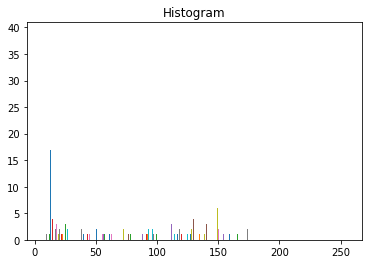

89.6732533522
[89.673253352152429, 83.0, 5293.2073811991468]


In [18]:
slice_ = nii.getSlice(50, axis='coronal') # Don't call it slice, or you will overwrite a python method named slice!
#plt.imshow(slice_)
print(slice_.shape)

# TODO: compute and show a histogram of the slice with 256 bins
# reshape the 3D Array to 2D
#np.histogram((slice_, bins=[0,256] dtype='float')
nbins=32 
bins_range=(0, 256)
np.histogram(slice_, bins=nbins, range=bins_range)
plt.hist(slice_, bins=256)  # arguments are passed to np.histogram
plt.title("Histogram")
plt.show()
# TODO: Obtain mean, median and variance image intensity of the current slice
# and store them in a variable called "features_stats. Print them
mean = np.ma.average(slice_)
print(mean)
features_stats=[]
features_stats.append(mean)
features_stats.append(np.median(slice_))
features_stats.append(np.var(slice_))
print (features_stats)       

# Connected Components Feature Extraction
Now let us threshold the image and compute the connected components
* threshold at intensity ?
* compute connected components on the binary image
* obtain area and spatial moments up to 3rd order, store them into the variable features_cc

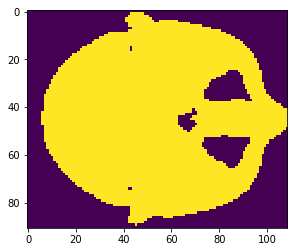

(array([[   1,    1,    2, ...,   49,   49,   49],
       [  50,   50,   50, ...,   95,   94,   96],
       [  50,   50,   54, ...,   94,   94,   94],
       ..., 
       [5455, 5455, 5455, ..., 5501, 5501, 5501],
       [5539, 5539, 5540, ..., 5584, 5584, 5584],
       [5585, 5585, 5539, ..., 5627, 5627, 5627]]), 5627)


In [34]:
from skimage import measure
# TODO: threshold the previously extracted slice and obtain a binary image
# in which you can separate the brain from background
# Choose an appropriate threshold
def color_thresh(img, threshold=(160)):
    # Create an array of zeros same xy size as img, but single channel
    color_select = np.zeros_like(img[:,:])
    # Require that each pixel be above all thre threshold values in RGB
    # above_thresh will now contain a boolean array with "True"
    # where threshold was met
    above_thresh = (img[:,:] > threshold)
                #& (img[:,:] > threshold[1]) \
              
    # Index the array of zeros with the boolean array and set to 1
    color_select[above_thresh] = 1
    # Return the binary image
    return color_select

slice_ = nii.getSlice(50, axis='coronal')
colorsel = color_thresh(slice_, threshold=(50))
plt.imshow(colorsel)
plt.show()
print(measure.label(slice_, connectivity=2,return_num=True))
# TODO: Show the binary image
# TODO: Compute the connected components using the "measure" module from "skimage". 
# Print the number of connected components and some of the features of the first connected component

# Group D
In this exercise, you will load a mammography image in PGM format, visualize it and extract some patches. We want to encourage you to write code that is easy to understand and well structured, so everything will be encapsulated in classes ;)

The image is donwloaded from http://peipa.essex.ac.uk/info/mias.html

In [ ]:
# Class for working with a MINC file in the context of machine learning
# You will complete this class in the tasks below

def read_pgm(filename, byteorder='>'):
    """Return image data from a raw PGM file as numpy array.

    Format specification: http://netpbm.sourceforge.net/doc/pgm.html

    """
    with open(filename, 'rb') as f:
        buffer = f.read()
    try:
        header, width, height, maxval = re.search(
            b"(^P5\s(?:\s*#.*[\r\n])*"
            b"(\d+)\s(?:\s*#.*[\r\n])*"
            b"(\d+)\s(?:\s*#.*[\r\n])*"
            b"(\d+)\s(?:\s*#.*[\r\n]\s)*)", buffer).groups()
    except AttributeError:
        raise ValueError("Not a raw PGM file: '%s'" % filename)
    return np.frombuffer(buffer,
                            dtype='u1' if int(maxval) < 256 else byteorder+'u2',
                            count=int(width)*int(height),
                            offset=len(header)
                            ).reshape((int(height), int(width)))

class PGM:
    
    def __init__(self, filename):
        # TASK 1
        # Load the file and store the result inside an instance attribute called "data" using read_pgm
        return None
        
    @property
    def width(self):
        # TASK 1
        # Complete: return the width of the PGM
        return None

    @property
    def height(self):
        # TASK 1
        # Complete: return the height of the PGM
        return None

    @property
    def channels(self):
        # TASK 1
        # Complete: return the number of channels of the PGM
        # Note: The PGM can, but need not have more than 1 channel.
        return None
        
    def normalize(self):
        # TASK 3
        # Convert the attribute "data" to float()
        
        # Make sure the data is in the range from 0 to 1
        return None
        
    def getData(self):
        # TASK 4
        # Return the image data
        return None
        
    def getPatch(self, y, x, height, width):
        # TASK 2
        # Extract a patch from the image given x,y and width, height
        return None
    
    def getRandomPatch(self, height, width):
        # TASK 2
        # Extract a patch around a randomly computed y,x coordinate
        return None
        
    def visualize(self):
        # TASK 2
        # Simply visualize the loaded image using matplotlib
        
    def printStats(self):
        # TASK 1
        # Print min, max, mean, width, height, channels
    

# Task 1: Implement the constructor and the method printStats() of class PGM
* The class PGM takes as argument a filename and should load a mammography image file in PGM format.
* Use the method read_pgm which is provided for you
* Further, implement printStats(), which should simply print some information about the image such as min(), max(), mean() and its dimensions
* Therefore, implement the properties width, height and channels!

In [ ]:
mg = PGM('data/mdb008.pgm')
mg.printStats()

# Task 2: Write a method to visualize the image, and run it
* implement the method visualize() using matplotlib

In [ ]:
mg.visualize()

# Task 3: Normalization and Patch Extraction
* Data usually should be normalized to avoid numerical instabilities
* implement a method normalize() which normalizes the data as described in the method skeleton
* afterwards, implement the methods getPatch(y, x, height, width) and getRandomPatch(height, width) for cropping patches from the image
* use these methods to extract 16 random patches of size 64x64px in the code cell below
* then visualize these patches using montage2d

In [ ]:
mg.normalize()
mg.printStats()

# Extract 16 random patches and store them in an numpy array
    
# Visualize them using montage2d


# Task 4: Statistical Feature Extraction
Now let us use the entire image and extract some image features
* get and show a histogram of image intensities in the image with 256 bins
* therefore, write a method getData() in class PGM for obtaining the data, use it and store the result in a variable named "image_"
* collect statistical features such as mean, median, variance

In [ ]:
# TODO: get the image data and store it in a variable named image_

# TODO: compute and show a histogram of the slice with 256 bins

# TODO: Obtain mean, median and variance image intensity
# and store them in a variable called "features_stats. Print them
